**Set environment**

In [1]:
suppressWarnings(suppressMessages(source("../config/config_sing.R")))
library(UpSetR)
show_env()

You are in Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/out 
CODE DIRECTORY (FD_CODE): /data/reddylab/Kuei/code 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/code/Proj_CombEffect_ENCODE_FCC 
PATH OF RESULTS (FD_RES): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc 
PATH OF LOG     (FD_LOG): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc/log 


**Check data files**

In [2]:
fdiry = file.path(FD_RES, "results", "region", "annotation_fcc_table")
for (txt in dir(fdiry)){cat(txt, "\n")}

annotation_ccre 
annotation_chromHMM 
annotation_tss_pol2 
description.tsv 
fcc_table.starrmpra.crispri.atac.concat.bed.gz 
fcc_table.starrmpra.crispri.atac.e2g_benchmark.concat.bed.gz 
fcc_table.starrmpra.crispri.atac.e2g_benchmark.e2g_prediction.concat.bed.gz 
fcc_table.starrmpra.crispri.atac.e2g_benchmark.e2g_prediction.merge.bed.gz 
fcc_table.starrmpra.crispri.atac.e2g_benchmark.e2g_prediction.merge.tsv 
fcc_table.starrmpra.crispri.atac.e2g_benchmark.merge.bed.gz 
fcc_table.starrmpra.crispri.atac.e2g_benchmark.merge.tsv 
fcc_table.starrmpra.crispri.atac.merge.bed.gz 
fcc_table.starrmpra.crispri.atac.merge.tsv 
summary 


## Import data

In [3]:
fdiry = file.path(FD_RES, "results", "region", "annotation_fcc_table")
fname = "fcc_table.starrmpra.crispri.atac.e2g_benchmark.merge.bed.gz"
fpath = file.path(fdiry, fname)

cnames = c("Chrom", "Start", "End", "Assay_Type", "Assay_Label")
dat = read_tsv(fpath, col_names=cnames, show_col_types=FALSE)
dat = dat %>% 
    dplyr::mutate(Region = paste0(Chrom, ":", Start, "-", End)) %>%
    dplyr::select(Chrom, Start, End, Region, Assay_Type, Assay_Label)

dat_region_merge_import = dat
print(dim(dat))
head(dat)

[1] 348966      6


Chrom,Start,End,Region,Assay_Type,Assay_Label
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
chr1,10015,10442,chr1:10015-10442,ATAC,ATAC
chr1,14253,14645,chr1:14253-14645,ATAC,ATAC
chr1,16015,16477,chr1:16015-16477,ATAC,ATAC
chr1,17237,17772,chr1:17237-17772,ATAC,ATAC
chr1,28903,29613,chr1:28903-29613,ATAC,ATAC
chr1,30803,31072,chr1:30803-31072,ATAC,ATAC


In [4]:
dat = dat_region_merge_import
txt = "ASTARR"
dat = dat %>% dplyr::filter(Assay_Type == txt)
table(dat$Assay_Label)


          ASTARR_A ASTARR_A,ASTARR_AB  ASTARR_A,ASTARR_R           ASTARR_R 
               335                 45                 38                726 

In [5]:
dat = dat_region_merge_import
txt = "ATAC"
dat = dat %>% dplyr::filter(Assay_Type == txt)
table(dat$Assay_Label)


  ATAC 
183366 

## Arrange and summary

In [6]:
dat = dat_region_merge_import
vec = sort(unique(dat$Assay_Type))
for (x in vec)
    print(x)

[1] "ASTARR"
[1] "ASTARR,ATAC"
[1] "ASTARR,ATAC,CRISPRi-Growth"
[1] "ASTARR,ATAC,CRISPRi-Growth,CRISPRi-HCRFF"
[1] "ASTARR,ATAC,CRISPRi-Growth,CRISPRi-HCRFF,ENCODE-E2G_Benchmark,LMPRA,TMPRA,WSTARR"
[1] "ASTARR,ATAC,CRISPRi-Growth,CRISPRi-HCRFF,ENCODE-E2G_Benchmark,TMPRA,WSTARR"
[1] "ASTARR,ATAC,CRISPRi-Growth,CRISPRi-HCRFF,LMPRA"
[1] "ASTARR,ATAC,CRISPRi-Growth,CRISPRi-HCRFF,LMPRA,TMPRA,WSTARR"
[1] "ASTARR,ATAC,CRISPRi-Growth,CRISPRi-HCRFF,LMPRA,WSTARR"
[1] "ASTARR,ATAC,CRISPRi-Growth,CRISPRi-HCRFF,TMPRA,WSTARR"
[1] "ASTARR,ATAC,CRISPRi-Growth,ENCODE-E2G_Benchmark"
[1] "ASTARR,ATAC,CRISPRi-Growth,ENCODE-E2G_Benchmark,LMPRA"
[1] "ASTARR,ATAC,CRISPRi-Growth,ENCODE-E2G_Benchmark,LMPRA,TMPRA,WSTARR"
[1] "ASTARR,ATAC,CRISPRi-Growth,ENCODE-E2G_Benchmark,LMPRA,WSTARR"
[1] "ASTARR,ATAC,CRISPRi-Growth,ENCODE-E2G_Benchmark,WSTARR"
[1] "ASTARR,ATAC,CRISPRi-Growth,LMPRA"
[1] "ASTARR,ATAC,CRISPRi-Growth,LMPRA,TMPRA"
[1] "ASTARR,ATAC,CRISPRi-Growth,LMPRA,TMPRA,WSTARR"
[1] "ASTARR,ATAC,CRISPRi-Growth

In [11]:
dat = dat_region_merge_import
dat = dat %>% 
    dplyr::filter( str_detect(Assay_Type, "CRISPRi-HCRFF")) %>% 
    dplyr::filter(!str_detect(Assay_Type, "STARR|MPRA")) %>%
    dplyr::arrange(Chrom, Start, End) %>%
    dplyr::distinct()
print(dim(dat))
dat

[1] 29  6


Chrom,Start,End,Region,Assay_Type,Assay_Label
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
chr11,5248847,5249047,chr11:5248847-5249047,CRISPRi-HCRFF,"CRISPRi-HCRFF:HBG1,CRISPRi-HCRFF:HBG2"
chr11,5253147,5253547,chr11:5253147-5253547,CRISPRi-HCRFF,"CRISPRi-HCRFF:HBG1,CRISPRi-HCRFF:HBG2"
chr11,5253647,5254647,chr11:5253647-5254647,"ATAC,CRISPRi-HCRFF","ATAC,CRISPRi-HCRFF:HBG1,CRISPRi-HCRFF:HBG2"
chr11,5282047,5282647,chr11:5282047-5282647,CRISPRi-HCRFF,"CRISPRi-HCRFF:HBG1,CRISPRi-HCRFF:HBG2"
chr11,5283047,5283447,chr11:5283047-5283447,CRISPRi-HCRFF,"CRISPRi-HCRFF:HBG1,CRISPRi-HCRFF:HBG2"
chr11,33880468,33883368,chr11:33880468-33883368,"ATAC,CRISPRi-Growth,CRISPRi-HCRFF","ATAC,CRISPRi-Growth,CRISPRi-HCRFF:LMO2"
chr11,33947368,33947868,chr11:33947368-33947868,CRISPRi-HCRFF,CRISPRi-HCRFF:LMO2
chr11,61796700,61797200,chr11:61796700-61797200,CRISPRi-HCRFF,CRISPRi-HCRFF:FEN1
chr11,61813200,61813600,chr11:61813200-61813600,CRISPRi-HCRFF,CRISPRi-HCRFF:FADS1


In [23]:
dat = dat_region_merge_import
dat = dat %>% dplyr::filter(Assay_Type != "ATAC")
dat = dat %>% dplyr::filter(Assay_Type != "ASTARR")
dat = dat %>% dplyr::filter(Assay_Type != "WSTARR")
dat = dat %>% dplyr::filter(Assay_Type != "ASTARR,WSTARR")
dat = dat %>% dplyr::filter(Assay_Type != "TMPRA")
dat = dat %>% dplyr::filter(Assay_Type != "LMPRA")
dat = dat %>% dplyr::filter(Assay_Type != "LMPRA,TMPRA")

dat = dat %>% dplyr::filter(Assay_Type != "ENCODE-E2G_Benchmark")
dat = dat %>% dplyr::filter(Assay_Type != "ATAC,ENCODE-E2G_Benchmark")

dat = dat %>% tidyr::separate_longer_delim(Assay_Type, ",")

dat_region_merge_arrange = dat
print(dim(dat))
head(dat)

[1] 164391      6


Chrom,Start,End,Region,Assay_Type,Assay_Label
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
chr1,136071,137429,chr1:136071-137429,ASTARR,"ASTARR_R,ATAC"
chr1,136071,137429,chr1:136071-137429,ATAC,"ASTARR_R,ATAC"
chr1,180982,182087,chr1:180982-182087,ASTARR,"ASTARR_R,ATAC"
chr1,180982,182087,chr1:180982-182087,ATAC,"ASTARR_R,ATAC"
chr1,183239,184602,chr1:183239-184602,ATAC,"ATAC,WSTARR_A"
chr1,183239,184602,chr1:183239-184602,WSTARR,"ATAC,WSTARR_A"


In [26]:
#dat = dat_region_merge_arrange
#dat = dat %>% dplyr::mutate(
#    Assay_Type = dplyr::recode(
#        Assay_Type,
#        "ENCODE-E2G_Benchmark" = "CRISPR EP Link"
#    ))

#dat_region_merge_arrange_rename = dat
#head(dat)

In [27]:
dat = dat_region_merge_arrange
dat = dat %>% 
    dplyr::filter(Assay_Type, "ENCODE-E2G_Benchmark") %>%
    dplyr::mutate(
        Assay_Type = ifelse(
            str_detect(Assay_Type, "STARR"),
            "STARR",
            Assay_Type
        )
    ) %>%
    dplyr::mutate(
        Assay_Type = ifelse(
            str_detect(Assay_Type, "MPRA"),
            "MPRA",
            Assay_Type
        )
    )
dat = dat %>% dplyr::distinct()
res = table(dat$Assay_Type)

###
dat_region_merge_summary = dat
print(res)
print(dim(dat))
head(dat)


                ATAC       CRISPRi-Growth        CRISPRi-HCRFF 
               64117                 6171                   75 
ENCODE-E2G_Benchmark                 MPRA                STARR 
                 320                35751                46723 
[1] 153157      6


Chrom,Start,End,Region,Assay_Type,Assay_Label
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
chr1,136071,137429,chr1:136071-137429,STARR,"ASTARR_R,ATAC"
chr1,136071,137429,chr1:136071-137429,ATAC,"ASTARR_R,ATAC"
chr1,180982,182087,chr1:180982-182087,STARR,"ASTARR_R,ATAC"
chr1,180982,182087,chr1:180982-182087,ATAC,"ASTARR_R,ATAC"
chr1,183239,184602,chr1:183239-184602,ATAC,"ATAC,WSTARR_A"
chr1,183239,184602,chr1:183239-184602,STARR,"ATAC,WSTARR_A"


In [17]:
dat = dat_region_merge_summary
lst = split(dat$Region, dat$Assay_Type)

lst_region = lst
lst = lapply(lst, length)
print(lst)

$ATAC
[1] 64166

$`CRISPR EP Link`
[1] 384

$`CRISPRi-Growth`
[1] 6171

$`CRISPRi-HCRFF`
[1] 75

$MPRA
[1] 35751

$STARR
[1] 46723



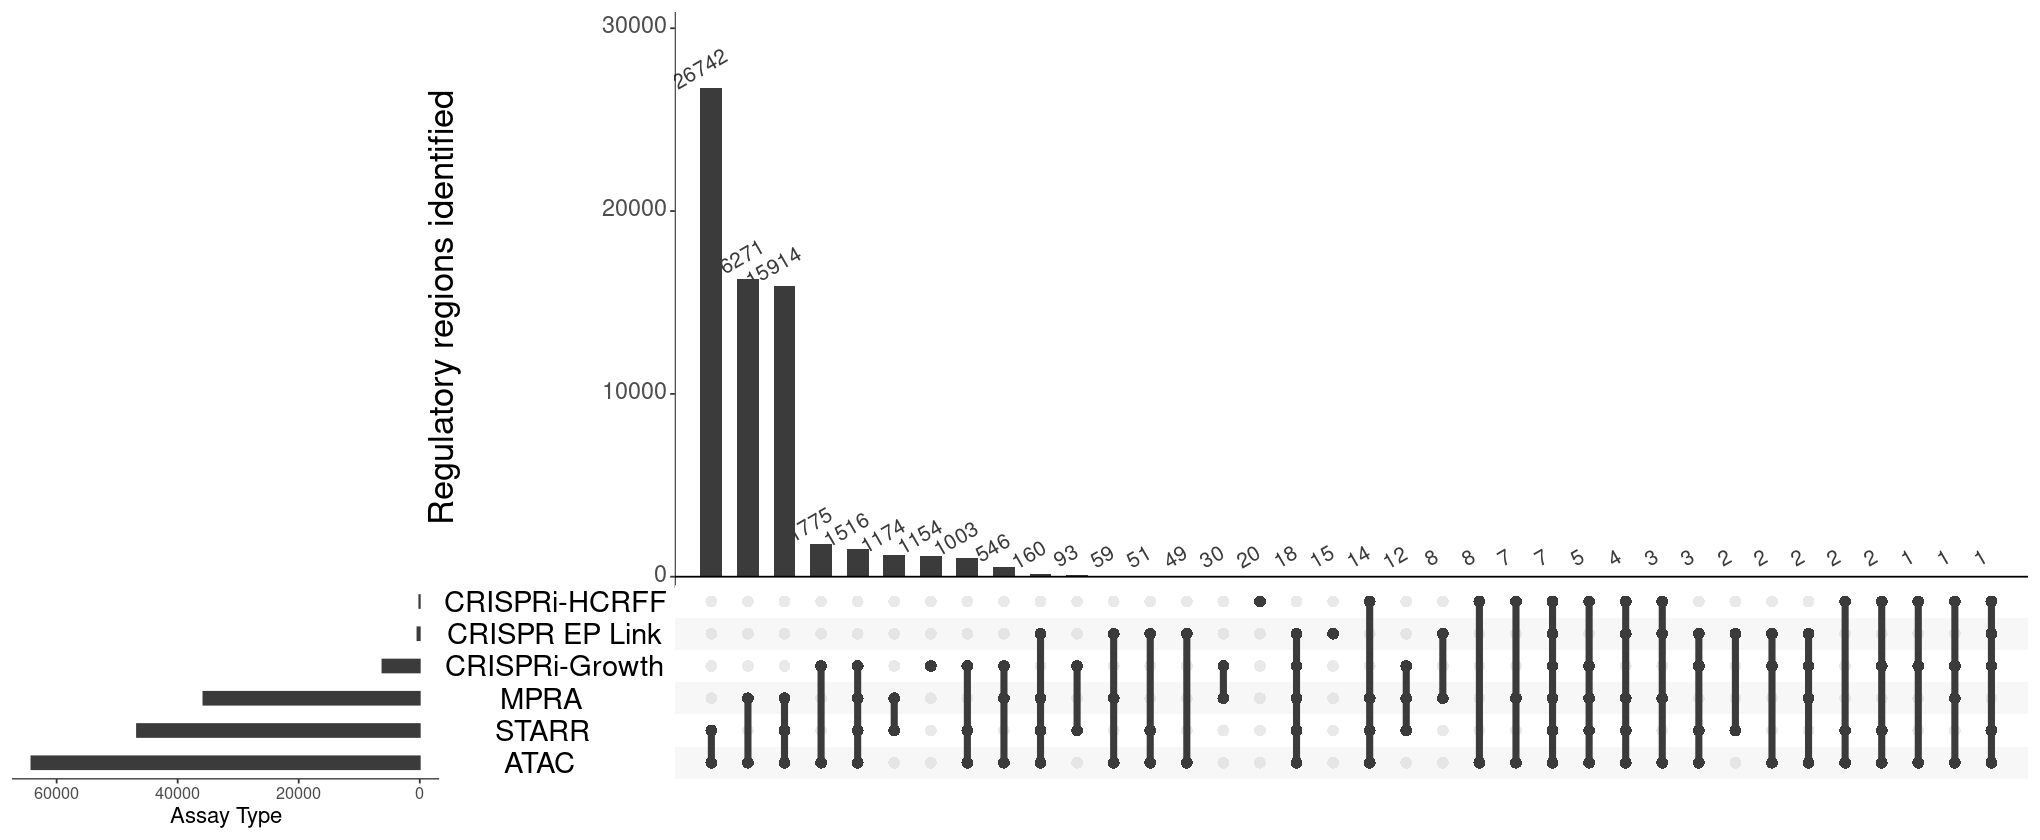

In [22]:
lst = lst_region

plt = upset(fromList(lst), 
      order.by = "freq", 
      nsets = 8,
      nintersects = NA,
      number.angles = 30,
      point.size = 3, 
      line.size  = 2,
      mb.ratio = c(0.7, 0.3),
      mainbar.y.label = "Regulatory regions identified", 
      sets.x.label    = "Assay Type", 
      text.scale = c(
          2.5, # upper barplot y axis title
          2, # upper barplot y axis text
          1.6, # left  barplot y axis title
          1.4, # left  barplot y axis text
          2.5, # set title
          2  # upper barplot count number
      )
)

options(repr.plot.height=7, repr.plot.width=17)
print(plt)